In [1]:
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as sts

### Будем наблюдать за поведением распределения Рэлея. Обычно оно используется для описания вероятности попадания в круговую мишень.
Имеет вид:
$f(x) = \frac{x^2}{\sigma^2}exp\left(- \frac{x^2}{2 \sigma^2} \right)$
Мат. ожидание:
$\sqrt{\frac{\pi}{2}}\sigma$

Дисперсия:
$\left(2 - \frac{\pi}{2}\right) \sigma^2$

## Генерируем выборку размером в 1000 элементов. Также рисуем поверх нее теоретическую плотность распределения пользуясь функцией библиотеки scipy "sts.rayleigh"

Text(0.5, 1.0, 'Распределение Реллея')

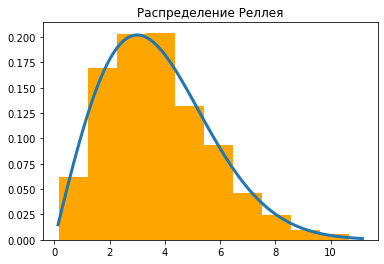

In [2]:
sigma = 3
reley = sts.rayleigh(loc=0, scale=sigma)
x = np.linspace(reley.ppf(.001),reley.ppf(.999),100)
array = reley.rvs(1000)
plt.hist(array, density=True, color='orange')
plt.plot(x, reley.pdf(x), linewidth=3)
plt.title('Распределение Реллея')

### Реализовываем функцию histogram_of_1000 принимающую как входные данные объект reley и количество элементов указывающих количество элементов в каждой из 1000 выборок

In [3]:
def histogram_of_1000(func, number_of_elements):

    def colorize(n):
        if (n % 10) == 1:
            return 'orange'
        if (n % 10) == 2:
            return 'black'
        if (n % 10) == 3:
            return 'red'
        if (n % 10) == 4:
            return 'pink'
        if (n % 10) == 5:
            return 'blue'
        if (n % 10) == 6:
            return 'red'
        if (n % 10) == 7:
            return 'yellow'
        if (n % 10) == 8:
            return 'blue'
        if (n % 10) == 9:
            return 'pink'
        if (n % 10) == 0:
            return 'red'

    std_values = []
    number = []
    for counter in range(1,1001):
        work_array = func.rvs(number_of_elements)
        std_values.append(np.average(work_array))
        number.append(counter)

    plt.hist(std_values,bins=40,color=colorize(number_of_elements), label='Histogram for n='+str(number_of_elements), density=True)
    plt.legend()

    math_exaption = (np.sqrt(np.pi  / 2)) * (sigma)
    dispertion = ((2  - (np.pi / 2)) * (sigma * sigma)) / number_of_elements

    normal = sts.norm(loc=math_exaption, scale=np.sqrt(dispertion))
    working_array = np.linspace(0,10, 100)
    plt.plot(working_array, normal.pdf(working_array))
    print('Параметр loc для n =',str(number_of_elements), 'функции sts.norm = ', math_exaption)
    print('Параметр scale для n =',str(number_of_elements), 'функции sts.norm возведенный в квадрат= ', dispertion)

### Строим график для n = 5

Параметр loc для n = 5 функции sts.norm =  3.7599424119465006
Параметр scale для n = 5 функции sts.norm возведенный в квадрат=  0.7725666117691862


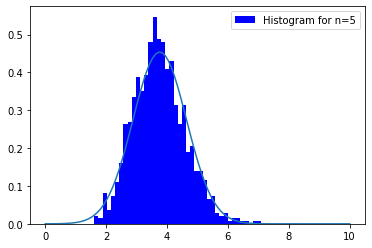

In [4]:
histogram_of_1000(reley, 5)

### Строим график для n = 10

Параметр loc для n = 10 функции sts.norm =  3.7599424119465006
Параметр scale для n = 10 функции sts.norm возведенный в квадрат=  0.3862833058845931


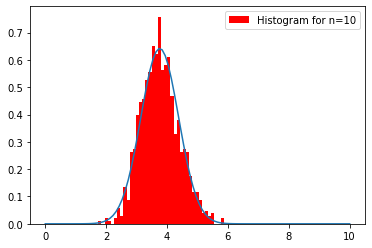

In [5]:
histogram_of_1000(reley, 10)

### Строим график для n = 50

Параметр loc для n = 50 функции sts.norm =  3.7599424119465006
Параметр scale для n = 50 функции sts.norm возведенный в квадрат=  0.07725666117691862


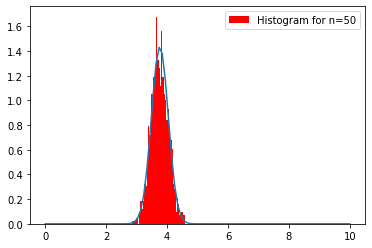

In [6]:
histogram_of_1000(reley, 50)

# Выводы
Видно что с увеличением n гистограмма принимает вид в большей мере напоминающий "шляпу", это значит что нормальное распределение для описания гистограммы случайного выборочного среднего будет хорошо аппроксимировать частотное распределение.

С ростом n улучшается точность аппроксимации, что подтверждено математическим аппаратом.